In [1]:
using Plots, LinearAlgebra

In [2]:
const L = [0.7, 1.1]
const Q = [0.85 0.15;
           0.05 0.95]
const beta, gamma, r, w = 0.85, 3.0, 0.03, 1.1

(0.85, 3.0, 0.03, 1.1)

In [3]:
amin = 1e-10
amax = 3.0
na = 500
agrid = collect(range(amin, amax, length=na))

500-element Array{Float64,1}:
 1.0e-10
 0.0060120241478957915
 0.012024048195791583
 0.018036072243687376
 0.024048096291583165
 0.030060120339478958
 0.03607214438737475
 0.04208416843527054
 0.04809619248316633
 0.054108216531062125
 0.060120240578957915
 0.0661322646268537
 0.0721442886747495
 ⋮
 2.933867735473146
 2.939879759521042
 2.9458917835689378
 2.9519038076168336
 2.9579158316647294
 2.963927855712625
 2.969939879760521
 2.975951903808417
 2.9819639278563126
 2.9879759519042084
 2.993987975952104
 3.0

In [4]:
function u(c)
    return c^(1-gamma)/(1-gamma)
end

u (generic function with 1 method)

In [5]:
function mymax(x)
    opt = -1e10
    arg = 0.0
    for i in eachindex(x)
        if x[i] >= opt
            opt = x[i]
            arg = i
        end
    end
    return opt, arg
end

mymax (generic function with 1 method)

In [47]:
function T(v, grid)
    vnext = zero(v)
    pol = zero(v)
    pol_arg = zero(v)
    for (il, l) in enumerate(L)
        prob = Q[il, :]
        for (ia, a) in enumerate(grid)
            ynow = w * l + (1+r) * a
            val =  zero(grid[ynow .- grid .> 0])
            for (ia_p, a_p) in enumerate(grid[ynow .- grid .> 0])
                val[ia_p] = u(ynow - a_p) + beta * v[ia_p, :]' * prob
            end
            opt, arg = mymax(val)
            vnext[ia, il] = opt
            pol[ia, il] = grid[arg]
            pol_arg[ia, il] = arg
        end
    end
    return vnext, pol, pol_arg
end

T (generic function with 1 method)

In [48]:
function VFI(vguess, grid; tol = 1e-4, maxiter = 1000)
    err = 1.0
    i = 0
    vnow = vguess
    pol, pol_arg = zero(vguess), zero(vguess)
    while err > tol && i < maxiter
        vnext, pol, pol_arg = T(vnow, grid)
        err = maximum(abs.(vnext - vnow))
        i += 1
        vnow = vnext
        if i%80 == 1
            println("iter: ", i, "error: ", err)
        end
    end
    return vnow, pol, pol_arg
end

VFI (generic function with 1 method)

In [49]:
vguess = hcat(u.(agrid), u.(agrid))
val, pol, pol_arg = VFI(vguess, agrid)

iter: 1error: 5.0e19


([-4.2886416135337315 -2.7204984391303175; -4.275239562645764 -2.7170107667886576; … ; -2.2624014484038795 -1.773434796059867; -2.2604949127207257 -1.7722496204557912], [1.0e-10 1.0e-10; 1.0e-10 0.0060120241478957915; … ; 2.374749499018838 2.5611222445036073; 2.3807615230667336 2.567134268551503], [1.0 1.0; 1.0 2.0; … ; 396.0 427.0; 397.0 428.0])

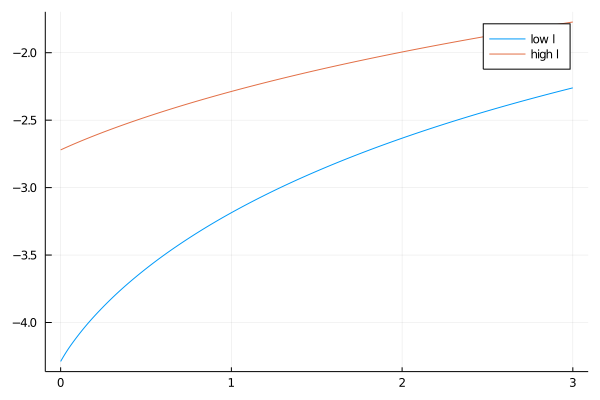

In [50]:
plot(agrid, val[:, 1], label="low l")
plot!(agrid, val[:, 2], label="high l")

In [61]:
function get_trans(pol_arg, grid)
    P = zeros((2*na, 2 * na))
    for il in eachindex(L)
        prob = Q[il, :]
        for ia in eachindex(grid)
            index = Int(pol_arg[ia, il])
            P[na * (il - 1) + ia, index] += prob[1]
            P[na * (il - 1) + ia, na + index] += prob[2]
        end
    end
    return P
end

get_trans (generic function with 1 method)

In [62]:
P = get_trans(pol_arg, agrid)

1000×1000 Array{Float64,2}:
 0.85  0.0   0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.85  0.0   0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.85  0.0   0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.85  0.0   0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.85  0.0   0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.85  0.0   0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.85  0.0   0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.85  0.0   0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.85  0.0   0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.85  0.0   0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.85  0.0   0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.85  0.0   0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.85  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0